1. 导入模块将wav无损音频分离到audio文件夹中

In [2]:
import os
from tqdm import tqdm, trange
import time
from moviepy.editor import *
video_path="./video"
audio_path="./audio"

In [3]:
video_list=os.listdir(video_path)
for file in tqdm((video_list),desc='processing'):
    if('.mp4' in file):
        video = VideoFileClip(video_path+"/"+file)
        audio = video.audio
        #print(file.replace(".mp4", ".wav"))
        (audio.write_audiofile(audio_path+'/'+file.replace(".mp4", ".wav")))

processing: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]         


MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch06.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch06.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch07.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch07.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch05.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch05.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch10.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch04.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch10.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch04.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch01.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch01.wav
MoviePy - Done.
MoviePy - Writing audio in .

2.使用librosa进行音频处理
2.1 120帧的video和240帧的audio

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch

processing audio:   0%|          | 0/20 [00:00<?, ?it/s]


735
<class 'int'>


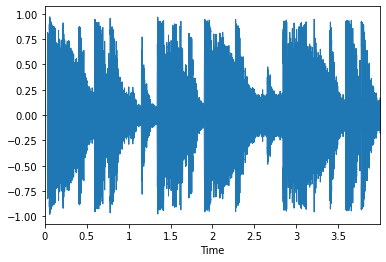

In [32]:
#frame_shift =
for audiofile in tqdm(os.listdir(audio_path),desc="processing audio"):
    envelop = audiofile
    y,sr=librosa.load(audio_path+"/"+audiofile,sr=None)#sr是采样率,None指原生采样率

    audio_duration = librosa.get_duration(y,sr)

    start=0
    duration = 4
    stop = start + duration
    audio_dist = y[start*sr:stop*sr]
    frame_shift = duration/240#帧长
    frame_length = 0.03125#帧移
    hop_length =int(duration * sr / 240) #frame_shift * sr
    win_length = int(frame_length*sr)

    print(hop_length)

    plt.figure()
    librosa.display.waveplot(audio_dist,sr)
    #librosa.display.waveplot(audio_dist,sr)
    mfccs=librosa.feature.mfcc(y=audio_dist,sr=sr,n_mfcc=20)
    print(type(hop_length))
    chroma=librosa.feature.chroma_stft(audio_dist,sr=sr,hop_length=hop_length,win_length=win_length)
    #peaks=librosa.util.peak_pick()
    break



In [6]:
print(os.getcwd())

/Users/zhanchao/GitHub/3DMotionGenerator/Dataset/aist_plusplus_final
